<a href="https://colab.research.google.com/github/elisabethelen/UAS_KecerdasanBuatan/blob/main/metode_klasifikasi_untuk_pemilihan_kontrasepsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Library dan Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# import library python

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [6]:
# import dataset

data = pd.read_csv('/content/drive/MyDrive/UASKecerdasanBuatan/dataset/kontrasepsi.csv')

# 1. Business Understanding

Pemerintah Indonesia telah melakukan survey pravelansi kontrasepsi. Sampel penelitian adalah hasil wawancara dengan wanita yang tidak sedang hamil. Tujuan dari survey ini adalah memprediksi pemilihan metode kontrasepsi (no use, long-term methods, or short-term methods) berdasarkan karakteristik demografi dan sosial ekonomi

(Source: https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice)

# 2. Data Understanding

In [7]:
# melihat dimensi data
data.shape

(1334, 10)

Dataset kontrasepsi.csv terdiri dari 1.334 data dan 10 atribut/feature

In [8]:
# melihat nama-nama atribut dan tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334 entries, 0 to 1333
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   usia_istri        1334 non-null   int64 
 1   pendidikan_istri  1334 non-null   object
 2   pendidikan_suami  1334 non-null   object
 3   jumlah_anak       1334 non-null   int64 
 4   agama             1334 non-null   object
 5   istri_bekerja     1334 non-null   object
 6   kesibukan_suami   1334 non-null   object
 7   standar_hidup     1334 non-null   object
 8   ekspose_media     1334 non-null   object
 9   metode            1334 non-null   object
dtypes: int64(2), object(8)
memory usage: 104.3+ KB


# 3. Data Preparation

### 3.1. Cek Missing Value

In [9]:
# cek apakah terdapat missing values
data.isnull().sum()

usia_istri          0
pendidikan_istri    0
pendidikan_suami    0
jumlah_anak         0
agama               0
istri_bekerja       0
kesibukan_suami     0
standar_hidup       0
ekspose_media       0
metode              0
dtype: int64

Nilai missing value dari semua atribut adalah 0 (nol), maka dapat diartikan tidak terdapat data missing value pada masing-masing atribut

### 3.2. Exploratory Data Analysis

#### 3.2.1. Univariate Analysis

##### Hisotgram Bar

<Axes: xlabel='usia_istri', ylabel='Count'>

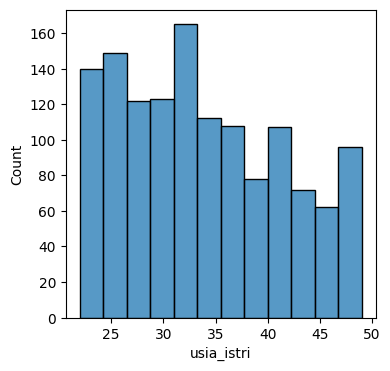

In [10]:
# Atribut usia_istri
plt.figure(figsize=(4,4))
sns.histplot(data['usia_istri'])

##### Bar Plot

<Axes: xlabel='count', ylabel='pendidikan_istri'>

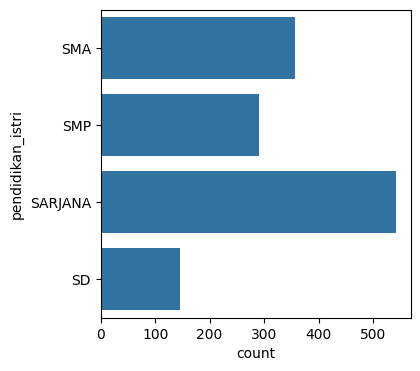

In [11]:
# Atribut pendidikan_istri
plt.figure(figsize=(4,4))
sns.countplot(data['pendidikan_istri'])

##### Box Plot

<Axes: ylabel='jumlah_anak'>

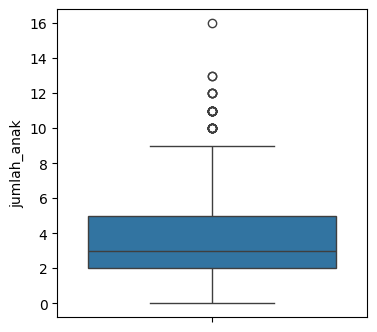

In [12]:
# atribut jumlah_anak

plt.figure(figsize=(4,4))
sns.boxplot(data['jumlah_anak'])

#### 3.2.2. Bivariate Analysis

##### Scatter Plot

<Axes: xlabel='usia_istri', ylabel='jumlah_anak'>

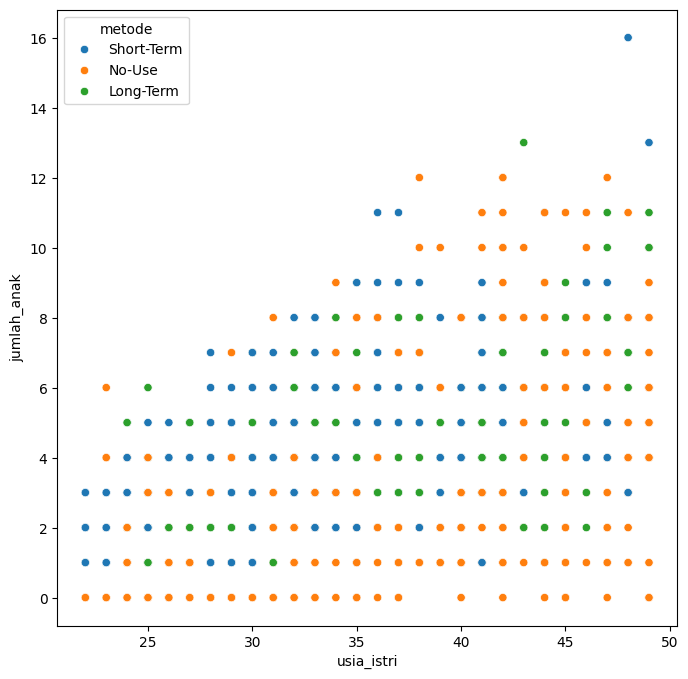

In [13]:
# korelasi antara atribut usia_istri dan jumlah_anak

plt.figure(figsize=(8,8))
sns.scatterplot(x= data['usia_istri'], y=data['jumlah_anak'], hue=data['metode'])

terlihat dari grafik scatter plot di atas bahwa tidak ada hubungan antara atribut usia_istri dengan atribut jumlah_anak

### 3.3. Data Transformation and Discretization

Beberapa metode yang sering digunakan untuk mengubah data kategorik, antara lain:
1. Manual
2. LabelEncoder
3. One-Hot Encoder

Dalam contoh kasus ini tipe data kategorik diubah menjadi numerik dengan cara diubah secara **manual**.

In [14]:
data['pendidikan_istri'].value_counts()

pendidikan_istri
SARJANA    542
SMA        356
SMP        290
SD         146
Name: count, dtype: int64

In [15]:
data['pendidikan_suami'].value_counts()

pendidikan_suami
SARJANA    827
SMA        307
SMP        158
SD          42
Name: count, dtype: int64

In [16]:
data['agama'].value_counts()

agama
Islam        1121
Non-Islam     213
Name: count, dtype: int64

In [17]:
data['istri_bekerja'].value_counts()

istri_bekerja
Ya       978
Tidak    356
Name: count, dtype: int64

In [18]:
data['kesibukan_suami'].value_counts()

kesibukan_suami
tinggi           514
rendah           417
sedang           379
sangat tinggi     24
Name: count, dtype: int64

In [19]:
data['standar_hidup'].value_counts()

standar_hidup
Sangat Tinggi    643
Tinggi           389
Sedang           195
Rendah           107
Name: count, dtype: int64

In [20]:
data['ekspose_media'].value_counts()

ekspose_media
Tidak    1232
Ya        102
Name: count, dtype: int64

In [21]:
data['metode'].value_counts()

metode
No-Use        553
Short-Term    462
Long-Term     319
Name: count, dtype: int64

In [22]:
replace_map = {
    "pendidikan_istri": {
        'SD': 1,
        'SMP': 2,
        'SMA': 3,
        'SARJANA': 4
    },

    "pendidikan_suami": {
        'SD': 1,
        'SMP': 2,
        'SMA': 3,
        'SARJANA': 4
    },

    "agama": {
        'Islam': 1,
        'Non-Islam': 2
    },

    "istri_bekerja": {
        'Ya': 1,
        'Tidak': 0
    },

    "kesibukan_suami": {
        'rendah': 1,
        'sedang': 2,
        'tinggi': 3,
        'sangat tinggi': 4
    },

    "standar_hidup": {
        'Rendah': 1,
        'Sedang': 2,
        'Tinggi': 3,
        'Sangat Tinggi': 4
    },

    "ekspose_media": {
        'Ya': 1,
        'Tidak': 0
    },

    "metode": {
        'No-Use': 1,
        'Short-Term': 2,
        'Long-Term': 3
    },
}
data = data.replace(replace_map)

In [23]:
data.head()

,usia_istri,pendidikan_istri,pendidikan_suami,jumlah_anak,agama,istri_bekerja,kesibukan_suami,standar_hidup,ekspose_media,metode
0,45,3,4,2,2,1,3,3,0,2
1,22,3,3,1,1,1,3,2,0,2
2,26,3,3,3,1,1,3,3,0,2
3,29,2,4,2,1,1,3,2,0,2
4,31,3,3,2,1,0,3,3,0,1


#### Correlation Matrix

In [24]:
# melihat korelasi antar atribut

korelasi = data.corr()
korelasi

,usia_istri,pendidikan_istri,pendidikan_suami,jumlah_anak,agama,istri_bekerja,kesibukan_suami,standar_hidup,ekspose_media,metode
usia_istri,1.000000,-0.070373,-0.076095,0.479692,0.115273,0.015477,-0.186083,0.142100,0.118412,-0.042930
pendidikan_istri,-0.070373,1.000000,0.620268,-0.212033,0.239231,-0.068582,-0.387630,0.380579,-0.344980,0.293271
pendidikan_suami,-0.076095,0.620268,1.000000,-0.207587,0.186216,0.000242,-0.333557,0.362992,-0.288130,0.186095
jumlah_anak,0.479692,-0.212033,-0.207587,1.000000,-0.101617,0.133114,-0.001326,-0.049795,0.135407,0.119251
agama,0.115273,0.239231,0.186216,-0.101617,1.000000,-0.060875,-0.084975,0.191432,-0.063815,0.107252
istri_bekerja,0.015477,-0.068582,0.000242,0.133114,-0.060875,1.000000,0.007194,-0.068184,0.014161,0.020514
kesibukan_suami,-0.186083,-0.387630,-0.333557,-0.001326,-0.084975,0.007194,1.000000,-0.293298,0.119598,-0.128252
standar_hidup,0.142100,0.380579,0.362992,-0.049795,0.191432,-0.068184,-0.293298,1.000000,-0.270515,0.207202
ekspose_media,0.118412,-0.344980,-0.288130,0.135407,-0.063815,0.014161,0.119598,-0.270515,1.000000,-0.157653
metode,-0.042930,0.293271,0.186095,0.119251,0.107252,0.020514,-0.128252,0.207202,-0.157653,1.000000


<Axes: >

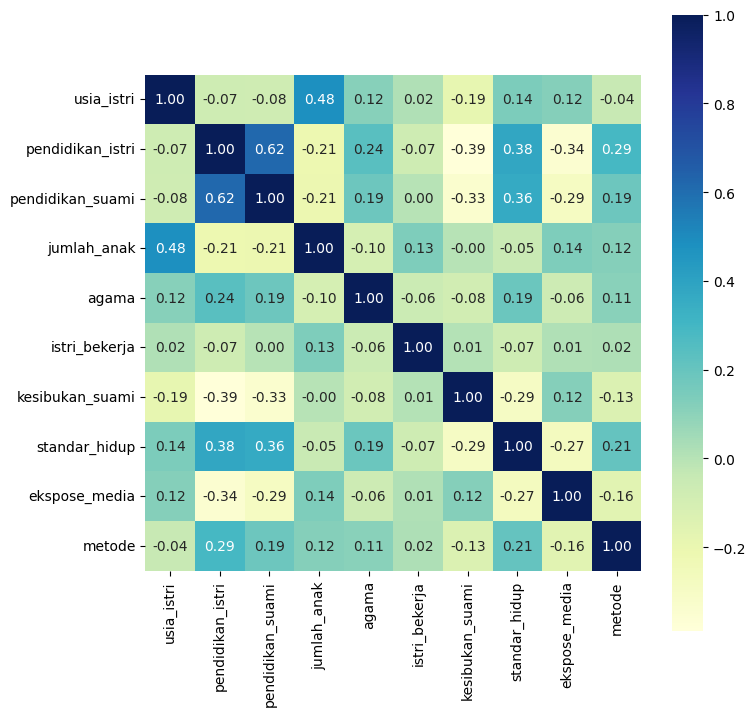

In [25]:
plt.figure(figsize=(8,8))
sns.heatmap(korelasi, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':10}, cmap='YlGnBu')

# 4. Modeling

In [26]:
# pisahkan antara atribut biasa dengan kelas (atribut spesial)

x = data.drop(columns='metode')
y = data['metode']

In [27]:
# split data menjadi data training dan data testing dengan proporsi 75% data training, dan 25% data testing

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=0)

print('data training:')
print(xtrain.shape)
print(ytrain.shape)
print('----------------')
print('data testing:')
print(xtest.shape)
print(ytest.shape)

data training:
(1000, 9)
(1000,)
----------------
data testing:
(334, 9)
(334,)


### 4.1. Algoritme k-NN

In [28]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', p=2, metric='euclidean')

# lakukan training
knn.fit(xtrain, ytrain)

# lakukan klasifikasi dengan algoritme k-NN
ypred = knn.predict(xtest)

# hitung akurasi
print(accuracy_score(ytest, ypred))

0.5359281437125748


### 4.3. Algoritme Naive Bayes

In [29]:
nb = GaussianNB()

# lakukan training
nb.fit(xtrain, ytrain)

# lakukan klasifikasi dengan algoritme Naive Bayes
ypred = nb.predict(xtest)

# hitung akurasi
print(accuracy_score(ytest, ypred))

0.4550898203592814


### 4.3. Algoritme Decision Tree

In [30]:
dt = DecisionTreeClassifier()

# lakukan training
dt.fit(xtrain, ytrain)

# lakukan klasifikasi dengan algoritme Decision Tree
ypred = dt.predict(xtest)

# hitung akurasi
print(accuracy_score(ytest, ypred))

0.437125748502994


# 5. Evaluation

##### Perbandingan Algoritme k-NN, Naive Bayes, dan Decision Tree

In [31]:
models = [knn, nb, dt]
nilai_akurasi = []
for model in models:
    ypred = model.predict(xtest)
    akurasi = accuracy_score(ytest, ypred)
    nilai_akurasi.append(akurasi)
print(nilai_akurasi)

[0.5359281437125748, 0.4550898203592814, 0.437125748502994]


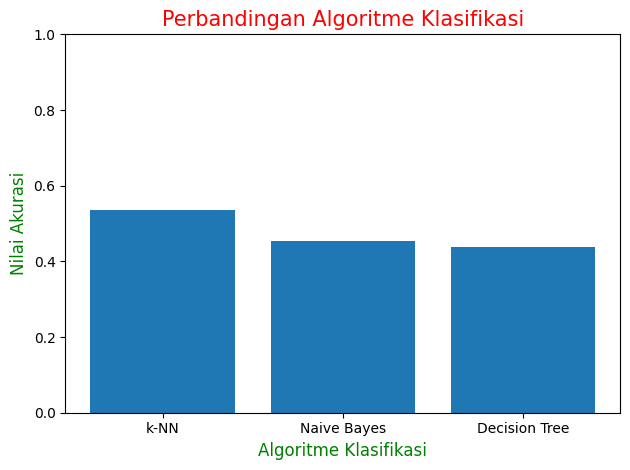

In [32]:
plt.bar(['k-NN', 'Naive Bayes', 'Decision Tree'],nilai_akurasi)
plt.ylim(0.00, 1.00)
plt.title("Perbandingan Algoritme Klasifikasi", fontsize=15, color='r')
plt.xlabel('Algoritme Klasifikasi', fontsize=12, color='g')
plt.ylabel('Nilai Akurasi', fontsize=12, color='g')
plt.tight_layout()
plt.show()

Dari ketiga algoritme di atas terlihat bahwa algoritme k-NN menghasilkan nilai akurasi tertinggi untuk klasifikasi pemilihan kontrasepsi

# 6. Deployment

Akan menerapkan **algoritme k-NN** untuk klasifikasi pemilihan kontrasepsi